In [1]:
import cv2, numpy as np #opencv에는 qr코드를 인식할 수 있는 라이브러리가 없다.
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
#import imutils
import qrcode
#from pyzbar.pyzbar import decode
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook



output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

float32
(600, 868)
-0.005183762
0.010007294


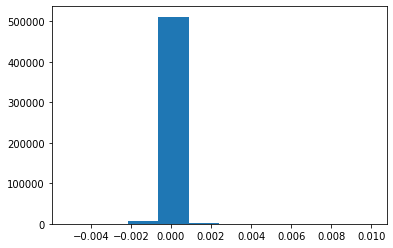

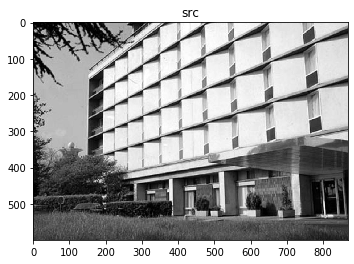

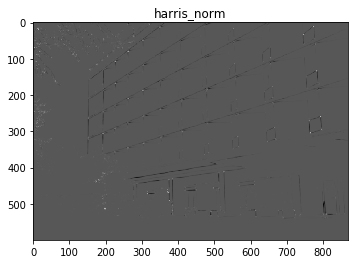

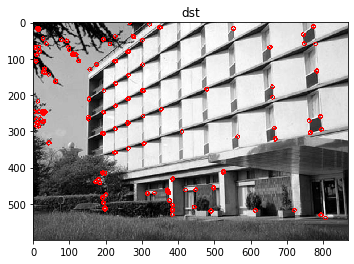

In [2]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

#block 크기, 소벨 크기, k = 0.04 ~ 0.06 R = DET() - kTr(), 보통 코너점은0.04 ~ 0.06 사이에서 나온다는것을 발견
#R = 0이면, 코너가 아니라는 의미

#코너를 검출하기 위해서는 기본적으로 소벨필터를 사용해야 한다.
harris = cv2.cornerHarris(src, 3, 3, 0.04) #최초의 코너 알고리즘, 얘는 R값이 나온다. 정수가 아니다. float32로 나온다.
#점 하나만 가지고, 코너인지 아닌지 모른다. 보통 3*3에서, 내가 코너인지 아닌지 판단한다.
print(harris.dtype)
print(harris.shape)
print(np.min(harris))
print(np.max(harris))

plt.hist(harris.ravel()) #어느정도 값에 코너값이 나오는지, 히스토그램으로 확인
plt.show()

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) #이를 0 ~ 255로 정규화

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

#dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
#dst = cv2.GaussianBlur(dst, (25, 25), 0)
#imshow('dst', dst)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

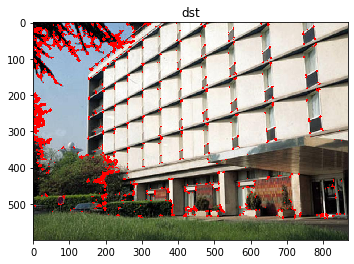

In [3]:
gray = cv2.imread('building.jpg', 0)
img = cv2.imread('building.jpg')

dst = cv2.cornerHarris(gray, 5, 3, 0.04)

img[dst>0.01*dst.max()] = [0, 0, 255]
#최대값의 1%를 임계값으로 잡는다. 이 값들을 [0, 0, 255]값으로 잡는다. for 문장에 비해 편리하고, 성능도 우수하다.

imshow('dst', img)

In [4]:
#예시를 통한 이해
a = np.array([[1, 2, 4], [7, 0, 1]])
print(a)
b = a > 3
print(b)
#여기까지가 img[dst>0.01*dst.max()]

a[b] = 100
print(a)
#여기까지가 [0, 0, 255]
#numpy는 편리하고 빠르다.

[[1 2 4]
 [7 0 1]]
[[False False  True]
 [ True False False]]
[[  1   2 100]
 [100   0   1]]


uint8


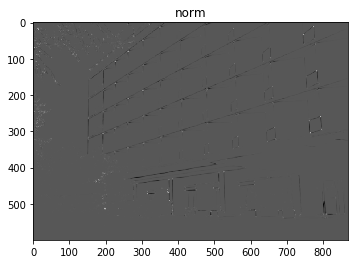

In [5]:
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) #이를 0 ~ 255로 정규화

print(harris_norm.dtype)
imshow("norm", harris_norm)

#밝은 지점, 값이 높은지점, 즉, 다른곳보다 harris_response 값이 높은것, 코너일 확률이 높다.

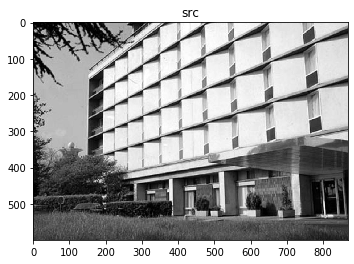

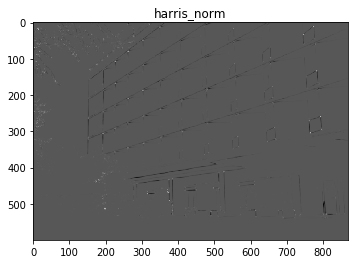

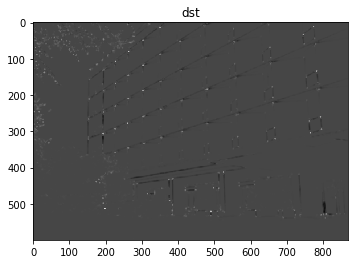

In [6]:
#흑백이미지는 2차원 배열이므로
for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 128: #128보다 크면, 원을 그려준다.(많이 검출되는게 좋은것은 아니다!) 원점 : (x,y), 원의 RGB, 선의 두께
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

#인간의 코너와 기계의 코너는 의미가 다르다. 기계는 모든 방향으로의 방향의 변화가 생기는것, 즉, edge발생

float32
(490, 686)
-0.0011498799
0.003965296


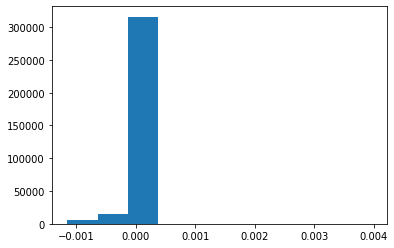

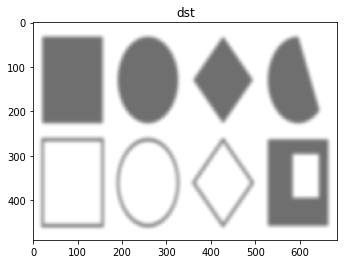

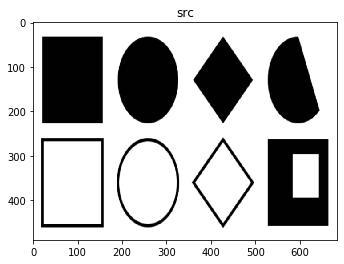

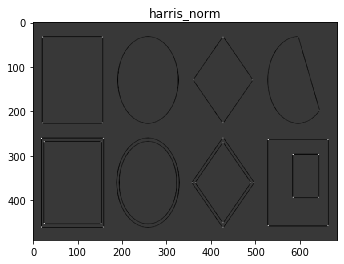

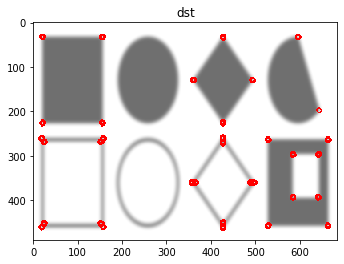

In [7]:
src = cv2.imread('corner.PNG', cv2.IMREAD_GRAYSCALE)

#block 크기, 소벨 크기, k = 0.04 ~ 0.06 R = DET() - kTr(), 보통 코너점은0.04 ~ 0.06 사이에서 나온다는것을 발견
#R = 0이면, 코너가 아니라는 의미

#코너를 검출하기 위해서는 기본적으로 소벨필터를 사용해야 한다.
harris = cv2.cornerHarris(src, 3, 3, 0.04) #최초의 코너 알고리즘, 얘는 R값이 나온다. 정수가 아니다. float32로 나온다.
#점 하나만 가지고, 코너인지 아닌지 모른다. 보통 3*3에서, 내가 코너인지 아닌지 판단한다.
print(harris.dtype)
print(harris.shape)
print(np.min(harris))
print(np.max(harris))

plt.hist(harris.ravel()) #어느정도 값에 코너값이 나오는지, 히스토그램으로 확인
plt.show()

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) #이를 0 ~ 255로 정규화

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

dst = cv2.GaussianBlur(dst, (25, 25), 0)
imshow('dst', dst)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 60:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

float32
(480, 640)
-0.0028865575
0.0031013857


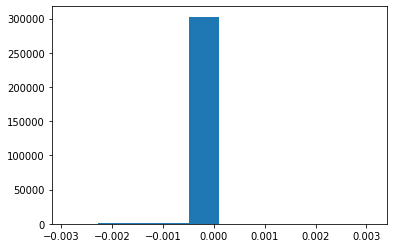

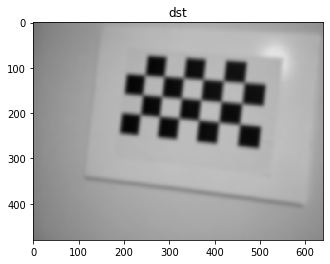

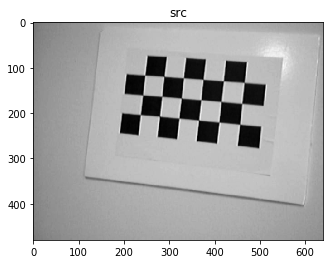

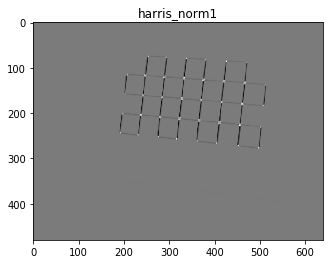

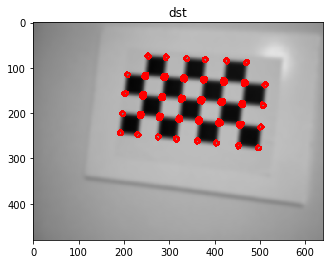

In [8]:
src1 = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)


#block 크기, 소벨 크기, k = 0.04 ~ 0.06 R = DET() - kTr(), 보통 코너점은0.04 ~ 0.06 사이에서 나온다는것을 발견
#R = 0이면, 코너가 아니라는 의미

#코너를 검출하기 위해서는 기본적으로 소벨필터를 사용해야 한다.
harris1 = cv2.cornerHarris(src1, 3, 3, 0.04) #최초의 코너 알고리즘, 얘는 R값이 나온다. 정수가 아니다. float32로 나온다.

#점 하나만 가지고, 코너인지 아닌지 모른다. 보통 3*3에서, 내가 코너인지 아닌지 판단한다.
print(harris1.dtype)
print(harris1.shape)
print(np.min(harris1))
print(np.max(harris1))



plt.hist(harris1.ravel()) #어느정도 값에 코너값이 나오는지, 히스토그램으로 확인
plt.show()


harris_norm1 = cv2.normalize(harris1, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) #이를 0 ~ 255로 정규화



dst1 = cv2.cvtColor(src1, cv2.COLOR_GRAY2BGR)
dst1 = cv2.GaussianBlur(dst1, (25, 25), 0)
imshow('dst', dst1)

for y in range(harris_norm1.shape[0]):
        for x in range(harris_norm1.shape[1]):
            if harris_norm1[y, x] > 128:
                cv2.circle(dst1, (x, y), 5, (0, 0, 255), 2)

imshow('src', src1)
imshow('harris_norm1', harris_norm1)
imshow('dst', dst1)



92
(254.0, 75.0)


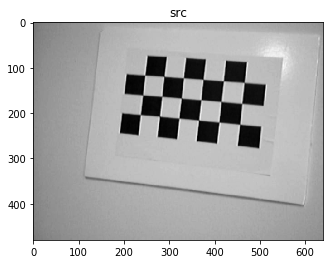

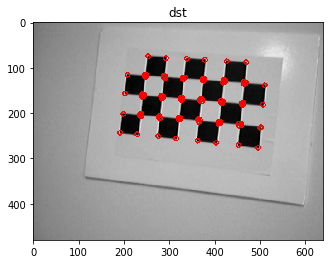

In [9]:
#src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첩되서 검출될수 있음.
#Harris Coner보다 20, 30배 빠르다.
keypoints = fast.detect(src)
print(len(keypoints)) #특징점의 개수

#C스타일
x = keypoints[0].pt[0]
y = keypoints[0].pt[1]

#위의 두 줄과 같은의미, 파이썬 스타일
x, y = keypoints[0].pt

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

print(keypoints[0].pt) #0번째 코너의 좌표값, 파이썬의 단점, 무슨 값을 return 하는지 모른다.

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

(480, 640)


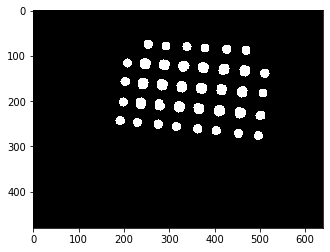

In [10]:
mask = np.zeros( src.shape, dtype='uint8')
print(mask.shape)
for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(mask, pt, 10, (255, 255, 255), -1)      
        
imshow("", mask)       

#칸투어의 중심점 찾기

38


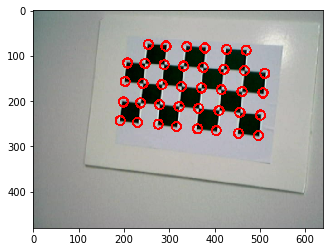

[[497, 276], [453, 271], [404, 265], [363, 261], [316, 256], [276, 251], [230, 247], [192, 243], [502, 231], [456, 225], [410, 221], [365, 216], [322, 212], [279, 208], [237, 204], [199, 202], [507, 182], [461, 179], [415, 175], [371, 171], [327, 168], [284, 164], [242, 161], [203, 157], [511, 139], [466, 133], [421, 130], [375, 126], [332, 123], [289, 120], [208, 116], [247, 117], [470, 88], [427, 86], [379, 83], [339, 80], [293, 79], [254, 75]]


In [11]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

src = cv2.imread('chessboard.jpg')
points = []
for con in contours :
    M = cv2.moments(con, True)
    #print(M)
    cx  = int(M['m10'] / M['m00'])
    cy  = int(M['m01'] / M['m00'])    
    cv2.circle(src, (cx,cy ), 10, (0,0, 255), 3)          
    points.append([cx, cy ])
imshow("", src)
print(points)

851


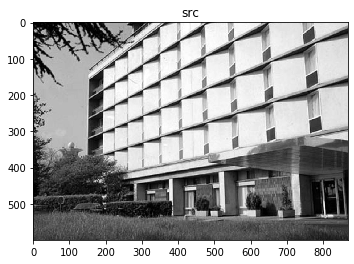

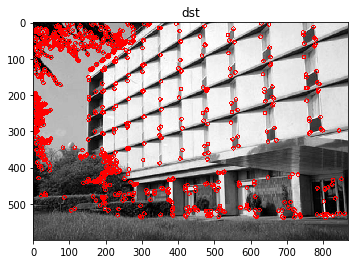

In [12]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(src)

print(len(keypoints))
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

0


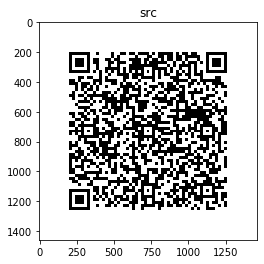

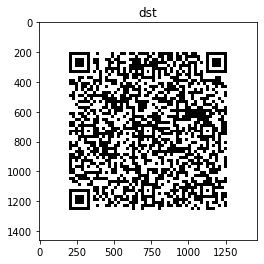

In [13]:
src = cv2.imread('qrcode.png', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(src)

print(len(keypoints))
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

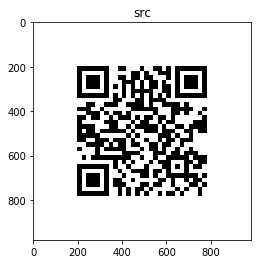

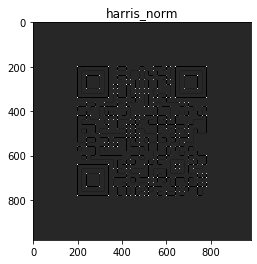

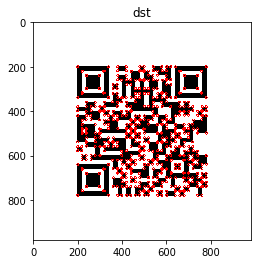

In [14]:
src = cv2.imread('acronet.png', cv2.IMREAD_GRAYSCALE)

harris = cv2.cornerHarris(src, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

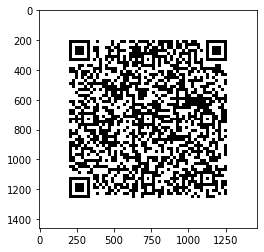

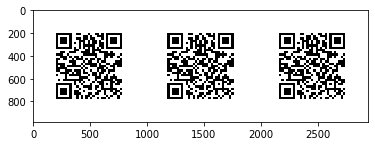

In [15]:
#imoprt qrcode는 인식은 못하고, qr코드를 만들 수 만 있다.

qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 20,
     border = 10)

url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EB%82%A0%EC%94%A8' #가급적이면 글자수가 적은게 잘된다.
qr.add_data(url)

qr.make()#qr 코드를 표준화된 방식에 맞춰  생성

img = qr.make_image(fill_color="black", back_color="white") #qr코드 이미지

plt.imshow(img, cmap="gray")
plt.show()

img.save("qrcode.png")

img = cv2.imread("acronet.png")
img = np.hstack([img, img, img])
cv2.imwrite("3.png", img)
imshow("", img)

C190000003031|31158


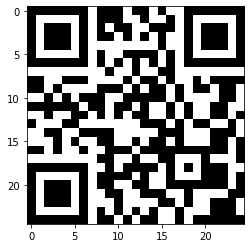

In [16]:
image = cv2.imread('mulcam.png')

qrDecoder = cv2.QRCodeDetector() #qrcode 영역을 찾아주는 함수
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image) #내용, 바운딩박스, 회전되있거나 한 모양을 네모나게 딱 잘라준다.

print(data)

imshow("", rectifiedImage)

[Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)]), Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)]), Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)]), Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)]), Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)]), Decoded(data=b

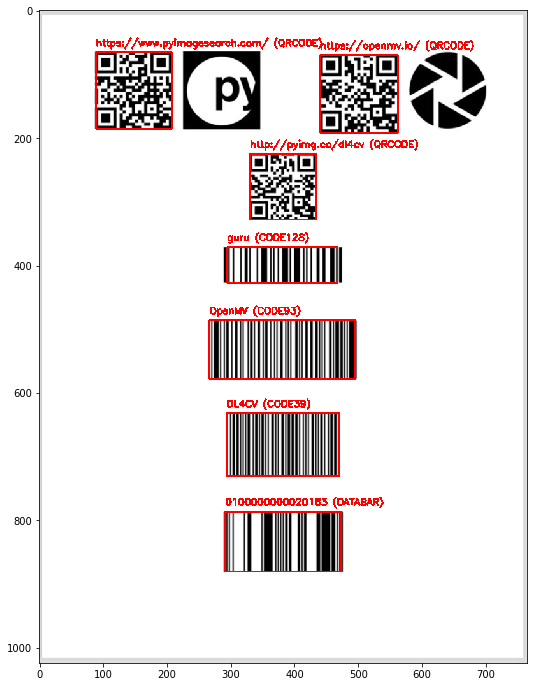

In [17]:
from pyzbar.pyzbar import decode
#qr 코드는 값을 안정적으로 인식할 수 있다.

image = cv2.imread('barqr.jpg')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        0.5, (0, 0, 255), 2) 
    
plt.figure(figsize = (12, 12))
imshow("", image)

len(keypoints): 500
desc.shape: (500, 32)


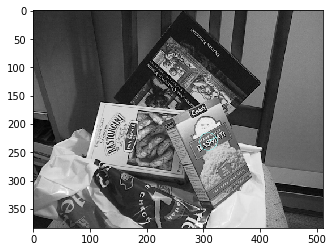

[ 93  89 127 161 134  90 182 224 108  96 119 162  95  30 163  41  51 213
 164 243  85 181  45 110 254 167  99  71 229  59  45  71]


In [18]:
#두 사진에서 코너점을 찾은 후, 서로 대응 되는지 보자
src = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()
keypoints = orb.detect(src)
keypoints, desc = orb.compute(src, keypoints)


print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)

keypoints = keypoints[0:1]

dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
#범위와 엣지방향
imshow("", dst)
print(desc[0])

In [19]:
print(type(keypoints[0]))
print(type(desc))    # 포인트갯수x 32바이트
print(keypoints1[171].pt)   # 171번째 점


imshow('src', src)
imshow('dst', dst)

<class 'cv2.KeyPoint'>
<class 'numpy.ndarray'>


NameError: name 'keypoints1' is not defined

desc1.shape: (453, 32)
desc2.shape: (500, 32)


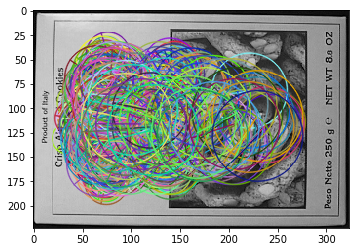

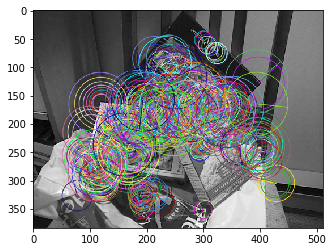

(56.400001525878906, 134.40000915527344)
[103 153 226  94 193 208  86 176 121  66 254  18 106 254  46 116  93 250
 182 194 221  47 246 227  19  62 144  75 127 173 248  70]
(121.20000457763672, 297.6000061035156)
[169  30  14  49 184 251 145 119 188 239 246 253 159   6 130 153 206  34
 206  52 189 207  97  12 236 195 122 209 202  76 175 217]


In [20]:
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
#src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
#src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
#자신의 주변 정보를 다 표시함
orb = cv2.ORB_create()

#keypoint에 대해서 위치정보
keypoints1, desc1 = orb.detectAndCompute(src1, None) #감지와 연산을 동시에 수행
keypoints2, desc2 = orb.detectAndCompute(src2, None) #감지와 연산을 동시에 수행

print('desc1.shape:', desc1.shape)
print('desc2.shape:', desc2.shape)
#453은 키포인트의 개수

#일일이 다 매칭시켜 비슷한지 알아본다.
dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                        cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
imshow("", dst2)

print(keypoints1[171].pt)
print(desc1[171])

print(keypoints2[171].pt)
print(desc2[171])

#이 두 이미지를 서로 연결시켜주는것이 match 함수

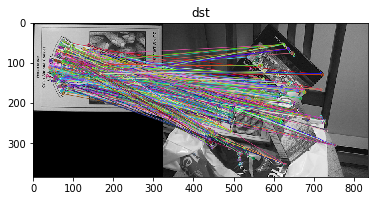

453
<DMatch 0000026F14037CD0>
0
487
86.0
-5.662790697674419
-3.1643835616438354
-2.909090909090909
-0.7471264367816093
2.4634146341463414
0.8701298701298699
5.2073170731707314
5.636363636363637
1.506849315068493
7.7368421052631575
7.987654320987654
4.578947368421052
5.9324324324324325
10.986486486486486
13.75
9.573170731707318
14.588235294117647
13.647887323943662
16.848837209302324
16.614285714285714
16.121951219512194
17.797619047619047
17.243243243243242
16.87142857142857
23.160493827160494
20.595238095238095
25.05263157894737
26.151898734177216
22.28787878787879
25.63855421686747
23.375
25.826666666666668
30.821428571428573
26.430555555555557
30.91025641025641
28.057142857142857
32.0253164556962
31.166666666666668
35.943661971830984
34.7037037037037
37.220588235294116
32.916666666666664
38.45679012345679
35.892307692307696
42.734939759036145
38.43421052631579
42.642857142857146
44.67088607594937
44.951219512195124
48.130434782608695
47.328947368421055
49.848101265822784
48.16883116

In [21]:
#얘는 이해하지 말자, 그냥, matcher이라는 알고리즘
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
#거리 재는법, 유클리드, 멘하탄, 해밍 3가지

matches = matcher.match(desc1, desc2) #두 이미지를 매치

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None) #첫번째 이미지에서의 키포인트, 두번째 이미지에서의 키포인트, matches는 매칭정보

imshow('dst', dst)
cv2.imwrite("orb.png", dst)

print(len(matches)) #비교해서 제일 작은것에 초점이 맞추어져 매칭된다. 항상 매치는 1:1

print(matches[0]) #클래스로 나온다.
print(matches[0].queryIdx) #첫번째 이미지의 점
print(matches[0].trainIdx) #두번째 이미지의 점
print(matches[0].distance) #두 점 사이의 거리, 이상적인 값은 0, 가장 근처에 있고, 유사하다고 생각되는 점끼리 매칭한것
#물론 0이라고 해서 같다고 볼 수는 없다.

for m in matches:
    print(f"{m.queryIdx - m.trainIdx / m.distance}")
    
print(keypoints1[matches[0].queryIdx].pt) #첫번째 이미지의 0번째 인덱스의 물리적인 좌표
print(keypoints2[matches[0].trainIdx].pt) #두번째 이미지의 0번째 인덱스의 물리적인 좌표

In [ ]:
#억지로 매칭을 시키지 말고, 실제 distance가 0에 가까운 요소만 추출한다.

maches = sorted(matches, key=lambda x:x.distance)
good_matches = matches[:20]#453개 중에서 거리가 가장 가까운 20개만 취한다.
dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

plt.figure(figsize = (24, 12))
imshow('dst2', dst2)
cv2.imwrite("orb2.png", dst2)

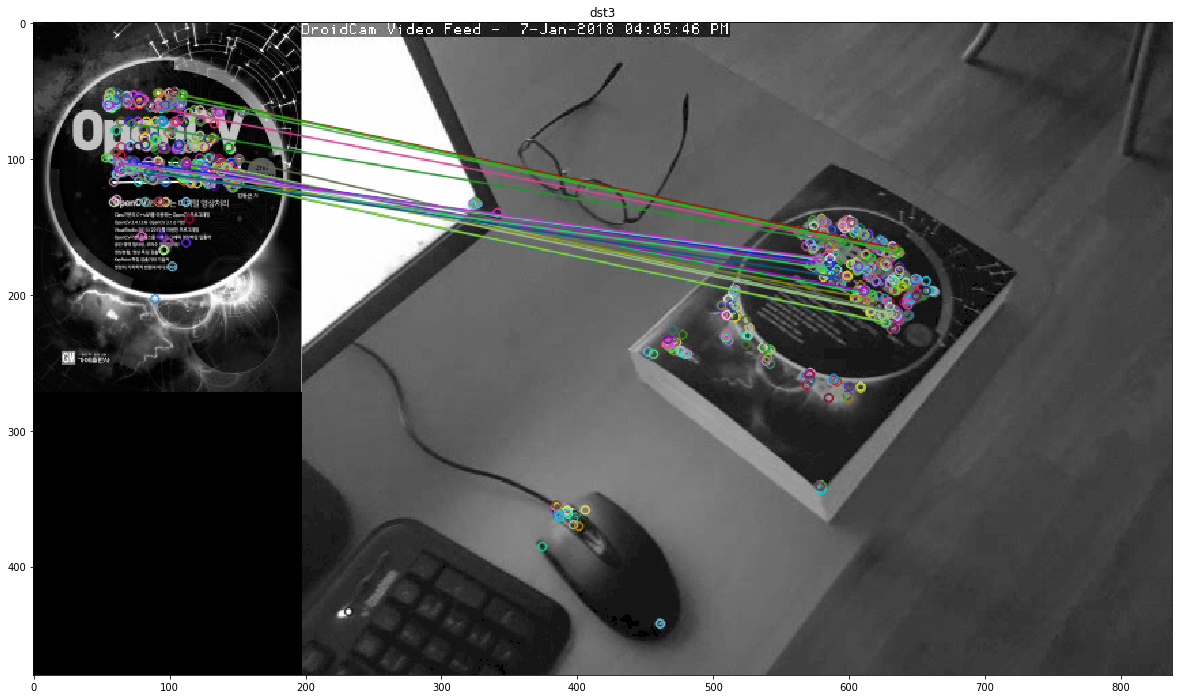

True

In [22]:
#오늘 공부해야할것, 이거!!!!
src1 = cv2.imread('book3.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('book3_1.jpg', cv2.IMREAD_GRAYSCALE)
    
orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:20]

dst3 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

plt.figure(figsize = (24, 12))
imshow('dst3', dst3)
cv2.imwrite("orb3.png", dst3)

#트래킹, 증강현실, 파노라마, 글자인식, 상표인식 모두 응용 가능

In [ ]:
#스티칭 또는 파노라마라고도 함
#files = ["img1.jpg", "img2.jpg", "img3.jpg"]
files = ["left.jpeg", "right.jpeg"]
imgs = []
for file in files:
    img = cv2.imread(file)
    imgs.append(img)
    
stitcher = cv2.Stitcher_create()
status, dst = stitcher.stitch(imgs)
cv2.imwrite('result.jpg', dst)
imshow('dst', dst)